### Белянинов Илья ПМ22-1

# Семинар

1. Сгенерировать датасет для задачи бинарной классификации с использованием функции make_classification.
2. Построить и оценить качество различных моделей классификации, используя метрики accuracy и F1-score.
3. Построить модель elasticnet на данных прогнозирования продаж.
4. Оптимизировать гиперпараметры данной модели с помощью поиска по сетке.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [3]:
X.shape, Y.shape

((1000, 5), (1000,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [6]:
X_test.shape, Y_test.shape

((200, 5), (200,))

In [7]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [8]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [9]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [10]:
import pandas as pd
import seaborn as sns

In [11]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values(by=["score"], ascending=False, inplace=True)
df

name  score
9          Neural_Net  0.865
4    Gaussian_Process  0.860
6       Decision_Tree  0.860
10           AdaBoost  0.855
12                QDA  0.855
1          Linear_SVM  0.850
8       Random_Forest  0.845
11        Naive_Bayes  0.845
0   Nearest_Neighbors  0.835
5   Gradient_Boosting  0.835
7         Extra_Trees  0.830
13                SGD  0.815
2      Polynomial_SVM  0.810
3             RBF_SVM  0.780

In [12]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

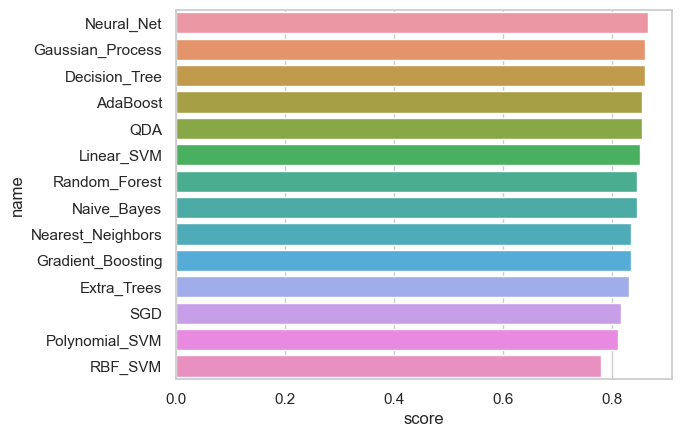

In [13]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [14]:
df = pd.read_csv("Advertising.csv")

In [15]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [16]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import ElasticNet

In [18]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alph

In [19]:
base_elastic_model = ElasticNet()

In [20]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [21]:
from sklearn.model_selection import GridSearchCV

In [30]:
# число verbose выбирайте сами
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [31]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [35]:
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

ElasticNet(alpha=0.1, l1_ratio=1)

In [36]:
y_pred = grid_model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test,y_pred)

2.3873426420874737

# Дополнительные задания

##### 1. При выборе модели мы обычно выбираем ту, которая дает наибольшее значение какой-то метрики. Но это означает, что эта оценка метрики уже становится завышенной. Поэтому для объективной оценки качества модели ее опять следует оценить на новом наборе данных. Поэтому для выбора модели нужно разделить выборку на три части - обучающую, валидационную и тестовую. Повторите первую часть работы, но с таким разбиением и получите несмещенную оценку качества наилучшей модели.

In [46]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, x, Y_train, y = train_test_split(X, Y, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [48]:
X_train.shape, X_valid.shape, X_test.shape

((700, 5), (150, 5), (150, 5))

In [49]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [51]:
validation_scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_valid, Y_valid)
    validation_scores.append(score)

In [53]:
best_classifier_index = np.argmax(validation_scores)
best_classifier_name = names[best_classifier_index]
best_classifier = classifiers[best_classifier_index]

In [55]:
print("Best classifier validation:", best_classifier_name)

Best classifier validation: Gaussian_Process


In [57]:
best_classifier_score = best_classifier.score(X_test, Y_test)
print("Score on test:", best_classifier_score)

Score on test: 0.8733333333333333


In [61]:
df = pd.DataFrame()
df['name'] = names
df['validation_score'] = validation_scores
df.sort_values(by=["validation_score"], ascending=False, inplace=True)
df

name  validation_score
4    Gaussian_Process          0.866667
9          Neural_Net          0.866667
10           AdaBoost          0.866667
8       Random_Forest          0.853333
11        Naive_Bayes          0.853333
1          Linear_SVM          0.846667
3             RBF_SVM          0.846667
6       Decision_Tree          0.846667
12                QDA          0.846667
7         Extra_Trees          0.833333
13                SGD          0.833333
0   Nearest_Neighbors          0.826667
5   Gradient_Boosting          0.806667
2      Polynomial_SVM          0.766667

In [62]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
print("Validation Scores:")
s

Validation Scores:


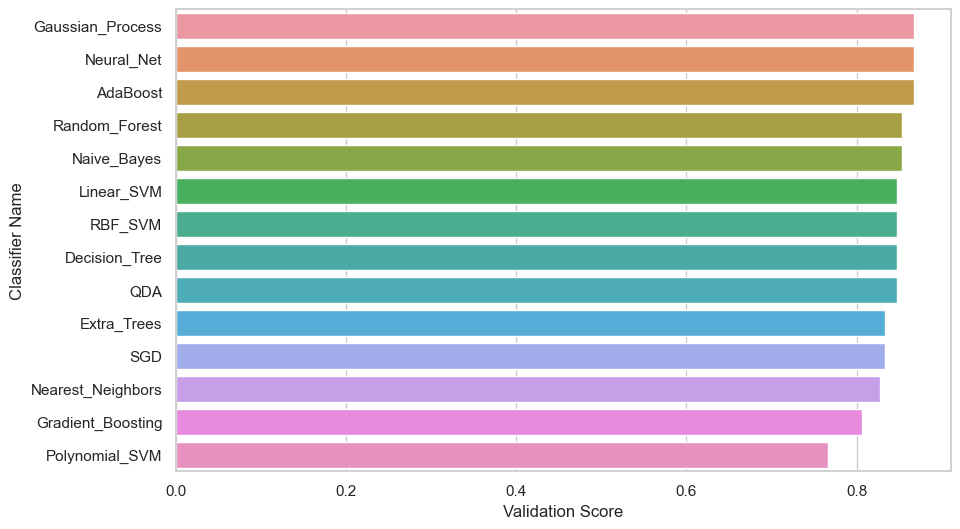

In [60]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(y="name", x="validation_score", data=df)
ax.set_xlabel("Validation Score")
ax.set_ylabel("Classifier Name")
plt.show()

##### 2. Оптимизируйте гиперпараметры той же модели, но другим методом - случайным поиском. Сравните полученные результаты.

In [68]:
df = pd.read_csv("Advertising.csv")

## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

base_elastic_model = ElasticNet()

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
params = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [72]:
random_search_model = RandomizedSearchCV(estimator=base_elastic_model,
                                   param_distributions=params,
                                   n_iter=20,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=2,
                                   random_state=42) 

In [73]:
random_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1,

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=20,
                   param_distributions={'alpha': [0.1, 1, 5, 10, 50, 100],
                                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                     0.99, 1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
random_search_model.best_estimator_ 
#параметры подобраные такие же, как и у gridsearch

ElasticNet(alpha=0.1, l1_ratio=1)

In [76]:
mean_squared_error(y_test,y_pred)

2.3873426420874737

##### 3. Во второй задаче найдите наиболее эффективный класс моделей, а затем оптимизируйте гиперпараметры у этой модели. Сравните, насколько лучше получилась модель.

In [84]:
df = pd.read_csv("Advertising.csv")

## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Разбиение на обучающий и тестовый наборы - TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабирование данных (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [152]:
names = [
    "LinearRegression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "DecisionTreeRegressor",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "MLPRegressor",
    "SVR"
]

regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(),
    SVR()]

models_scores = {}

In [153]:
scores = []
for name, reg in zip(names, regression_models):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    score = mean_squared_error(y_pred, y_test)
    scores.append(score)
    print(score)

2.2987166978863782
2.319021579428751
4.8947213308668625
7.536245046657615
1.3113333333333332
0.5703743999999988
0.5213586284895407
44.13591578595711
2.7640169111471438


C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [154]:
best_reg_index = np.argmin(scores)
best_reg_name = names[best_reg_index]
best_reg_score = regression_models[best_reg_index]
best_reg_name, scores[best_reg_index]

('GradientBoostingRegressor', 0.5213586284895407)

In [156]:
model = GradientBoostingRegressor()

In [157]:
params_grid = {
    'n_estimators': [10, 30, 50, 70, 100, 200, 400, 800], #количество базовых моделей (деревьев) в ансамбле
    'learning_rate': [0.1, 0.2, 0.3], # скорость обучения, коэффициент, с которым каждое дерево вносит свой вклад в итоговый прогноз. 
    'max_depth': [i for i in range(2, 8)], # максимальная глубина каждого дерева.
    'min_samples_split': [i for i in range(2, 6)], # минимальное количество выборок, необходимых для разделения внутреннего узла.
    'min_samples_leaf': [i for i in range(1, 6)], #  минимальное количество выборок, необходимых для формирования листа дерева.
    'max_features': ['auto', 'sqrt', 'log2'] #  количество признаков, рассматриваемых при разделении узла.
}

GridSearchCV

In [158]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=params_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [159]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2,

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, 

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, 

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, 

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, 

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, 

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, 

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, 

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, 

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_dep

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4,

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, 

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6

[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, 

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2

[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3,

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, 

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5

[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, 

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6

[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, 

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, 

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, 

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, 

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2,

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2,

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2,

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3

[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3,

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3,

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3,

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3,

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3,

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3,

[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dep

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4,

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.2s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, 

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, 

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, 

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.3, max_de

C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
14400 fits failed out of a total of 43200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ilya\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 70, 100, 200, 400, 800]},
             scoring='neg_mean_squared_error', verbose=2)

In [160]:
grid_model.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, max_features='sqrt',
                          min_samples_leaf=4)

In [161]:
best_model = GradientBoostingRegressor(learning_rate=0.3, max_depth=2, max_features='sqrt',
                          min_samples_leaf=4).fit(X_train,y_train)

In [162]:
y_pred = best_model.predict(X_test)

In [163]:
mean_squared_error(y_test,y_pred)
#результат улучшился

1.142473839464879

RandomizedSearchCV

In [165]:
random_search_model = RandomizedSearchCV(estimator=model,
                                   param_distributions=params_grid,
                                   n_iter=1000,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=2,
                                   random_state=42) 

In [167]:
random_search_model.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estim

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, 

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, 

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5

[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, 

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7

[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, 

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5,

[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_dep

[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_dept

[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, 

[CV] END learning_rate=0.3, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3,

[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, 

[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_de

[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, 

[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=

[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.1, max_de

[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_de

[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_dept

[CV] END learning_rate=0.1, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6,

[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, 

[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5

[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=400; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=6

[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.3, max_dept

[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.3s
[CV] END learning_rate=0.2, max_dep

C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1690 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1690 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ilya\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ilya\anaconda3\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=1000,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 30, 50, 70, 100,
                                                         200, 400, 800]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [168]:
random_search_model.best_estimator_

GradientBoostingRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=5,
                          min_samples_split=5, n_estimators=800)

In [169]:
y_pred = random_search_model.predict(X_test)

In [170]:
mean_squared_error(y_test,y_pred)
#результат получился еще лучше

0.9131468458874578